# Task: Fraud Transaction Detection

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:
data_df = pd.read_csv("D:\CDAC\machine_learning\creditcard.csv")
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [3]:
data_df.shape

(284807, 31)

In [4]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is highly imbalanced as we can see. Without using a balancing strategy, the use of original dataset to build a model would produce a highly overfitted model that won't be capable of detecting frauds. It would have high accuracy in predicting secure transactions but our objective here is to detect **fraudulent** transactions with high accuracy.

<AxesSubplot:xlabel='Class', ylabel='count'>

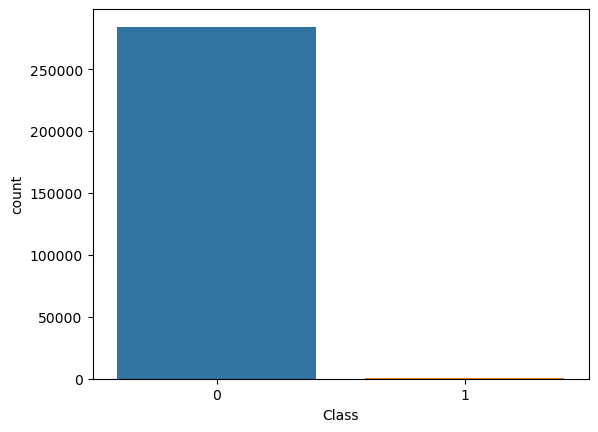

In [8]:
sns.countplot(data=data_df, x='Class')

We need to see the distributions of our variables so we converted out dataframe into the long format to help plot every feature in one go using **sns.FacetGrid**. We can see that **Time** and **Amount** are the only variables that do not follow a normal distribution and are skewed. All the other variables are standardized and follow a normal curve, though some of them have long tails.

## Scaling Time and Amount

We need to scale these variables as well in order to bring those values in the same range as other variables as models give weightage to variables that have high/low values (are not scaled).

In [4]:
from sklearn.preprocessing import RobustScaler

# Using robust scaler as it is robust to outliers
robust_scaler = RobustScaler()

data_df['Time'] = robust_scaler.fit_transform(data_df['Time'].values.reshape(-1, 1))
data_df['Amount'] = robust_scaler.fit_transform(data_df['Amount'].values.reshape(-1, 1))

data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


## Subsampling Dataframe using UnderSampling

We need to create a sample of our data with equal number of Fraud and Not Fraud transactions so it is easier for the model to identify variables and patterns that would help to determine if a transaction is fraudulent.

The basic reason to create a subsample is that when the data is heavily imbalanced, there is a huge chance of our model overfitting. In this particular use case, our model will assume most of the times that the transaction is not fraud, while our focus is specifically on identifying fraudulent transactions.

As there are only 492 fraud transactions in our data, we shuffle the data completely and extract the first 492 not fraud transaction for our sample.

In [5]:
data_df = data_df.sample(frac=1)

fraud_df = data_df[data_df['Class'] == 1]
not_fraud_df = data_df[data_df['Class'] == 0]

# Taking only 492 samples from not_fraud_df to cater class imbalance issue
not_fraud_df = not_fraud_df.iloc[:492]

# Joining the two dataframes for each class and reshuffling the rows
df = pd.concat([fraud_df, not_fraud_df]).sample(frac=1, random_state=42)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167038,0.396598,2.027063,-0.340335,-1.315803,0.178686,0.305711,0.155479,-0.219321,-0.002573,0.608186,...,-0.063884,-0.106305,0.021389,-1.363280,-0.065815,0.281827,-0.048733,-0.072092,0.152309,0
279863,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
161178,0.343766,-1.014045,0.198841,0.866278,-2.539986,0.280815,-0.734754,0.699215,-0.132952,-1.615720,...,0.441051,1.177706,-0.606167,-0.279511,1.155188,0.122706,0.082603,0.104111,0.403130,0
6108,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
234633,0.744381,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.285195,1


In [7]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

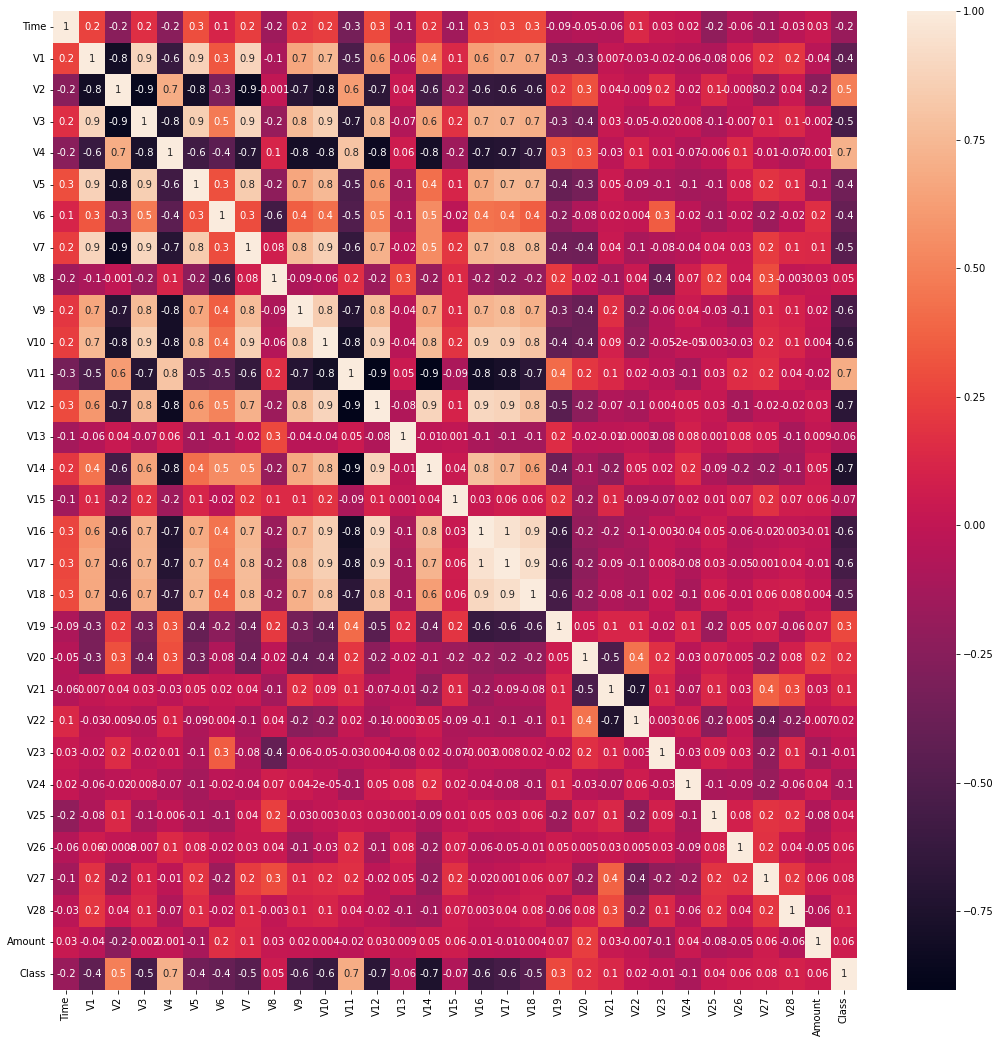

In [10]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, fmt='.1g')
plt.show()

We can see that V3, V9, V10, V12, V14, V16, V17 are **negatively** correlated to the target variable. Whereas, V2, V4, V11 are **positively** correlated to the target variable.

We will now carry out further analysis through visualizations to see the impact and relation of these variables on a transaction being fraudulent.

# Feature selection

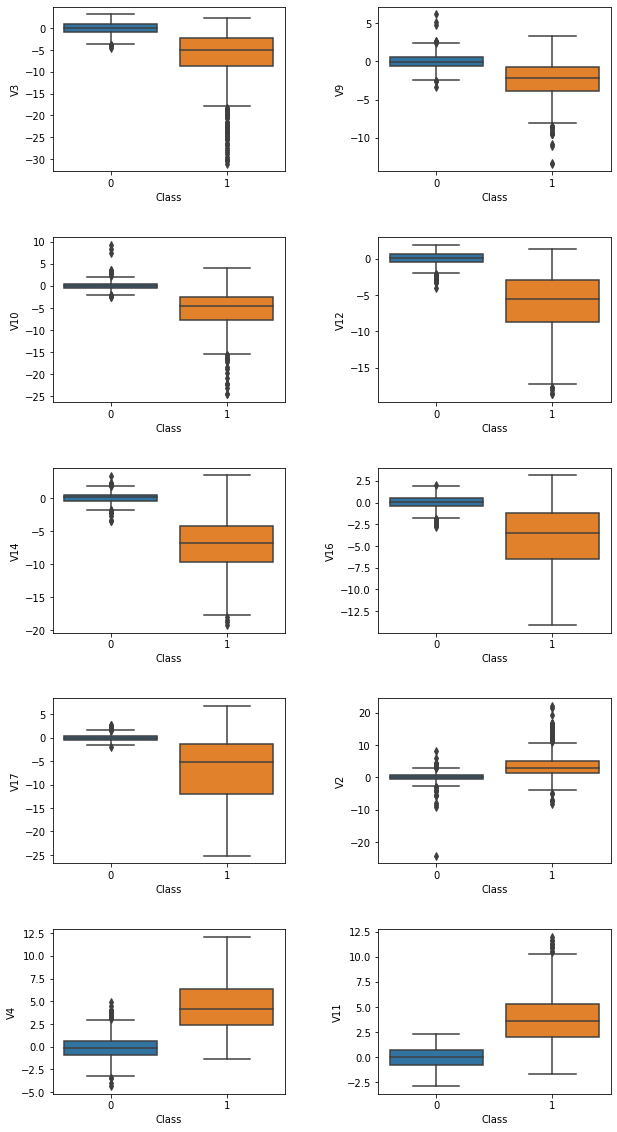

In [8]:
var = ['V3', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11']

fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, len(var)+1):
    ax = fig.add_subplot(5, 2, i)
    sns.boxplot(y=df.loc[:, var[i-1]], x=df['Class'], ax=ax)

The boxplots above uncover a very distinct relationship between the **Class** and other variables. We can clearly see that the variables with negative correlation have smaller value for fraudulent transactions while variables with positive correlation have greater value for fraudulent transactions as compared to non-fraudulent ones.

**Conclusion:** This means the lower the value for V3, V9, V10, V12, V14, V16, V17 is the more likely it is for the transaction to be fraudulent. And the higher the value for V2, V4, V11 is the more likely it is for the transaction to be fraudulent.

## Building Models

We will train 4 major classifiers to identify which one performs the best to detect fraud transactions. For the classifiers, **GridSearchCV** will be used to identify the best hyperparameters that give the best score.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df[['V3', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11']].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_params = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg']}

lr = LogisticRegression()
lr_cv = GridSearchCV(lr, lr_params, cv=5)
lr_cv.fit(X_train, y_train)
lr_model = lr_cv.best_estimator_
lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)

print("Best Model: ",lr_model)
print("Cross Val Score on Training data :", lr_train_score.mean())

Best Model:  LogisticRegression(C=0.1, solver='liblinear')
Cross Val Score on Training data : 0.9440780456341209


In [11]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

print('F1 Score: ', f1_score(y_train, lr_model.predict(X_train)))
print(classification_report(y_train, lr_model.predict(X_train)))

F1 Score:  0.9455040871934605
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       405
           1       0.99      0.91      0.95       382

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



# Save the model

In [14]:
import pickle
# Assuming your trained model is stored in a variable called "model"
with open('fraudDetection.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Prediction using saved model

In [19]:
with open('fraudDetection.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
predicted_labels = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, predicted_labels)
accuracy

#loaded_model.score(X_test,y_test)

0.9137055837563451

In [25]:
X[0]

array([-1.3158032 ,  0.6081863 ,  0.24544787,  0.61672079,  0.21806516,
        0.67173115, -1.16354662, -0.34033533,  0.17868627, -0.36679239])

In [26]:
loaded_model.predict([[-1.3158032 ,  0.6081863 ,  0.24544787,  0.61672079,  0.21806516,
        0.67173115, -1.16354662, -0.34033533,  0.17868627, -0.36679239]])

array([0], dtype=int64)

### 2. SVM

In [16]:
from sklearn.svm import SVC

svm_params = {'kernel':('linear', 'rbf', 'sigmoid'),
                  'C': [0.001, 0.01, 0.1]}

svm = SVC()
svm_cv = GridSearchCV(svm, svm_params, cv=5)
svm_cv.fit(X_train, y_train)
svm_model = svm_cv.best_estimator_
svm_train_score = cross_val_score(svm_model, X_train, y_train, cv=5)

print("Best Model: ",svm_model)
print("Cross Val Score on Training data :", svm_train_score.mean())

Best Model:  SVC(C=0.1, kernel='linear')
Cross Val Score on Training data : 0.933911150528098


In [17]:
print('F1 Score: ', f1_score(y_train, svm_model.predict(X_train)))
print(classification_report(y_train, svm_model.predict(X_train)))

F1 Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       405
           1       0.98      0.89      0.93       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



### 3. K Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(5,10),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2, 3]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, knn_params, cv=5)
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_
knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)

print("Best Model: ", knn_model)
print("Cross Val Score on Training data :", knn_train_score.mean())

Best Model:  KNeighborsClassifier(n_neighbors=6)
Cross Val Score on Training data : 0.9364669837942433


In [20]:
print('F1 Score: ', f1_score(y_train, knn_model.predict(X_train)))
print(classification_report(y_train, knn_model.predict(X_train)))

F1 Score:  0.938101788170564
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       405
           1       0.99      0.89      0.94       382

    accuracy                           0.94       787
   macro avg       0.95      0.94      0.94       787
weighted avg       0.95      0.94      0.94       787



### 4. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_params = {'criterion': ['gini', 'entropy', 'log_loss'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,5)]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_params, cv=5)
tree_cv.fit(X_train, y_train)
tree_model = tree_cv.best_estimator_
tree_train_score = cross_val_score(tree_model, X_train, y_train, cv=5)

print("Best Model: ", tree_model)
print("Cross Val Score on Training data :", tree_train_score.mean())

Best Model:  DecisionTreeClassifier(max_depth=6, splitter='random')
Cross Val Score on Training data : 0.9085140691768119


In [22]:
print('F1 Score: ', f1_score(y_train, knn_model.predict(X_train)))
print(classification_report(y_train, knn_model.predict(X_train)))

F1 Score:  0.938101788170564
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       405
           1       0.99      0.89      0.94       382

    accuracy                           0.94       787
   macro avg       0.95      0.94      0.94       787
weighted avg       0.95      0.94      0.94       787



# 5. Random Forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy with Random forest classifier" ,accuracy)


Accuracy with Random forest classifier 0.9390862944162437


In [31]:
print(f"Model: Random Forest Classifier")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, rf_y_pred)}")

Model: Random Forest Classifier
Confusion Matrix:
[[ 82   5]
 [  7 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       0.95      0.94      0.94       110

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



## Evaluation

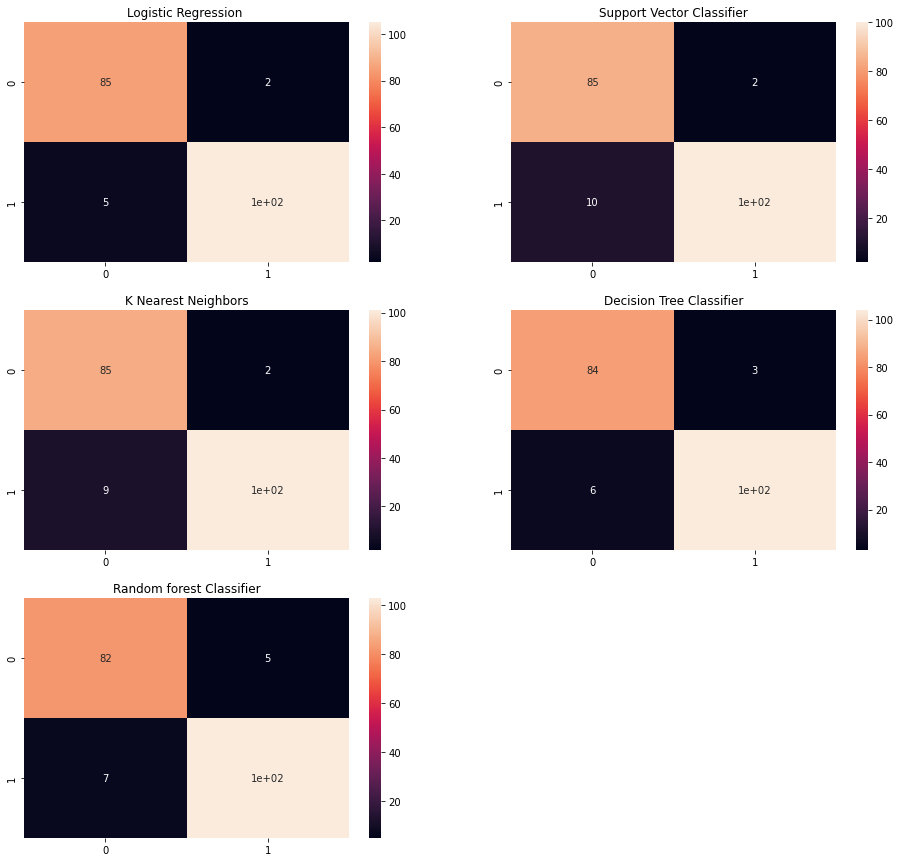

In [32]:
from sklearn.metrics import confusion_matrix

# SVM, KNN, Decision Tree trained on undersampled data
lr_model_ypred = lr_model.predict(X_test)
svm_model_ypred = svm_model.predict(X_test)
knn_model_ypred = knn_model.predict(X_test)
tree_model_ypred = tree_model.predict(X_test)

fig = plt.figure(figsize=(16, 15))

fig1 = fig.add_subplot(321)
sns.heatmap(confusion_matrix(y_test, lr_model_ypred), ax=fig1, annot=True)
fig1.set_title("Logistic Regression ")


fig2 = fig.add_subplot(322)
sns.heatmap(confusion_matrix(y_test, svm_model_ypred), ax=fig2, annot=True)
fig2.set_title("Support Vector Classifier")

fig3 = fig.add_subplot(323)
sns.heatmap(confusion_matrix(y_test, knn_model_ypred), ax=fig3, annot=True)
fig3.set_title("K Nearest Neighbors")

fig4 = fig.add_subplot(324)
sns.heatmap(confusion_matrix(y_test, tree_model_ypred), ax=fig4, annot=True)
fig4.set_title("Decision Tree Classifier")

fig5 = fig.add_subplot(325)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), ax=fig5, annot=True)
fig5.set_title("Random forest Classifier")
plt.show()

## Conclusion

Implementing necessary balancing techniques significantly increased the performance of the selected model when our data was highly imbalanced. Without implementing any balancing technique, our models were highly overfitted with very bad scores for detecting fraud transactions. This shows that balancing the classes by using any approach is necessary when dealing with imbalanced data. The first approach we used was undersampling where the performance increased but it was still misclassifying non-fraudulent transactions as fraudulent. This would surely increase dissatisfaction among the users if their normal transactions are reported as fraudulent and would certainly lead to a huge loss for the company. Therefore, we need to be careful to select the approach that would reduce both type of errors: Fraud transactions as non-fraudulent, and Not Fraud transactions as Fraudulent.